In [1]:
import bd
import pickle
import numpy as np
from Point import Point
from Limb import Limb

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import time
t = time.time()

In [2]:
#constants
ratio = 2
black = (0,0,0)
red = (1,0,0)
width, height = 1000, 1000

#to keep
l_arm = True
r_arm = True
l_leg = True
r_leg = True
neck = True
general = True

to_keep = [l_arm, r_arm, l_leg, r_leg, neck, general]

In [3]:
myPaintings = pickle.load(open('../data/myPaintings21400.p', 'rb'))[:21401]


## HERE go buc corrections to the catalog, which are numerous.... 
myPaintings[7465][1] = 'http://www.wga.hu/art/c/casa/portrait_C.jpg' ## and NOT portrait_c (lowercase), the original...

filtered_paintings = bd.filter_paintings(myPaintings)

print len(myPaintings)
print len(filtered_paintings)

21401
14896


In [4]:
#6 seconds in my computer
all_bodies = bd.construct_body_list(len(filtered_paintings)-1, filtered_paintings)
filtered_bodies = bd.filter_bodies(all_bodies)

print len(all_bodies)
print len(filtered_bodies)

67720
48689


In [5]:
all_relative_angles = bd.all_relative_angles(filtered_bodies)
deviation = bd.compute_std_deviation(all_relative_angles)

In [6]:
ll = bd.all_bodies_mean_limb_length(filtered_bodies)  * np.array(ratio)
ml = bd.middle_mean_length(filtered_bodies) * ratio

In [7]:
resized_bodies = bd.resize_bodies(filtered_bodies, ml)
print(time.time() - t)

90.3106451035


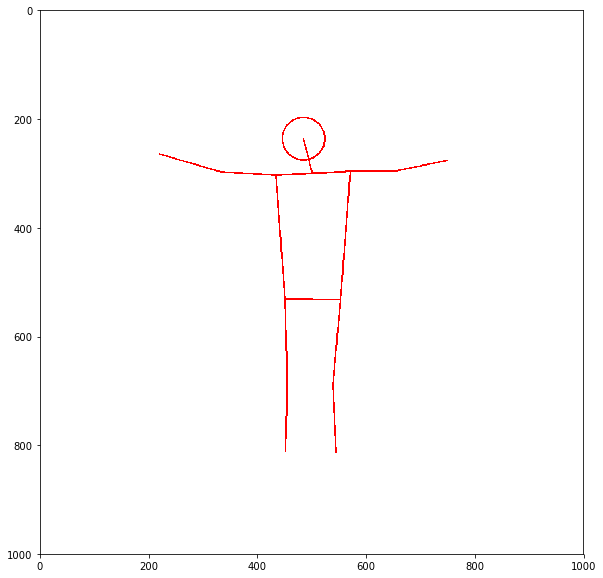

In [8]:
body_id = 2659
img = np.ones((height, width, 3))


resized_bodies[body_id].draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [9]:
#to change the number of random paintings, change n
n = 100
t = time.time()
#bd.p_values_random_hypothesis(n, filtered_paintings, filtered_bodies, all_relative_angles, deviation, approx=True)
print time.time() -t

3.71932983398e-05


In [10]:
base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))

In [55]:

t = time.time()
tree = bd.pre_fit(all_relative_angles, deviation, n=100, dist=50)
print time.time() - t

9.11960911751


In [66]:
bd.interactive_body(base_body, general = True)

In [ ]:
#bd.quick_research(base_body, 5, filtered_bodies, resized_bodies, all_relative_angles, filtered_paintings, deviation, tree)
#reload(bd)
bd.quick_research(base_body, 5, filtered_bodies, resized_bodies, all_relative_angles, filtered_paintings, deviation, tree)

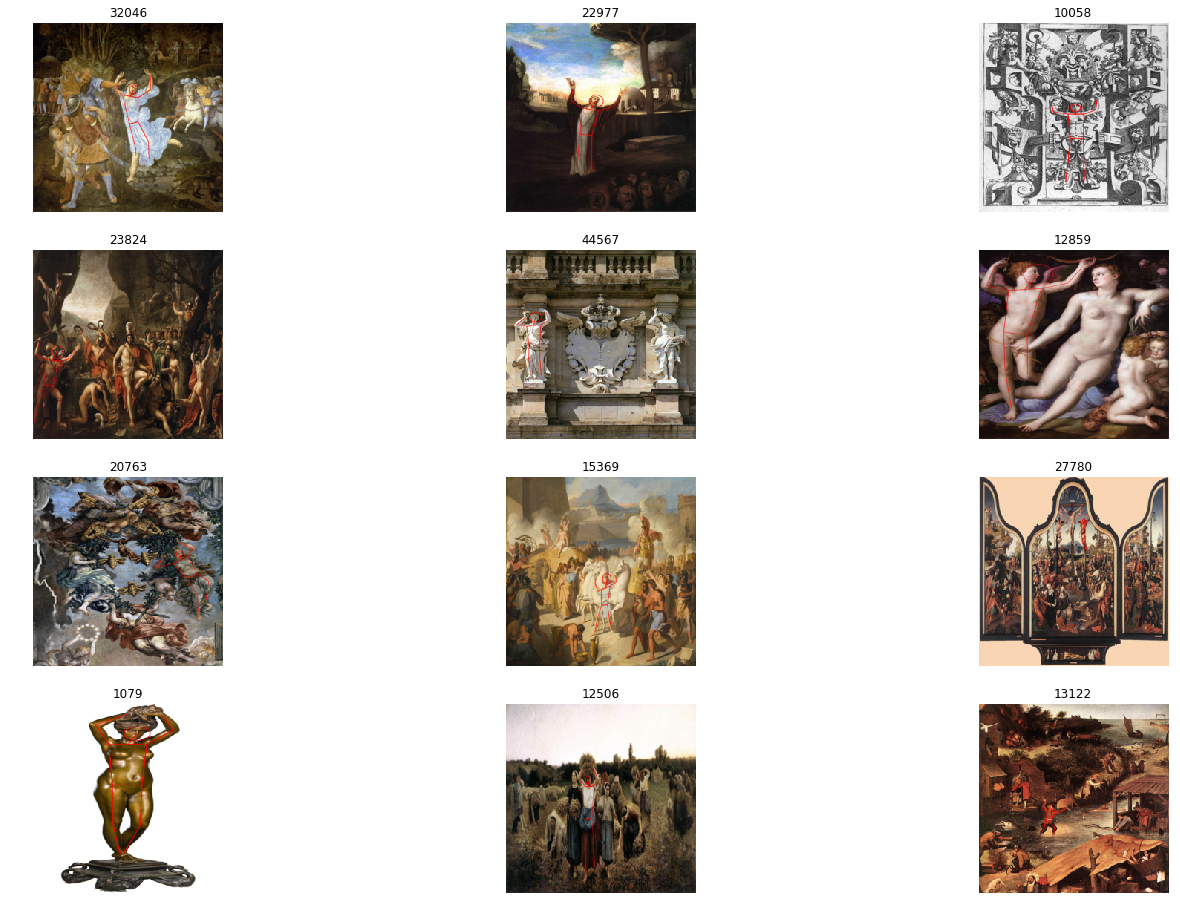

4.44281411171


In [60]:
#reload(bd)
t = time.time()
bd.plot_research(32046, 12, filtered_bodies, resized_bodies, all_relative_angles, filtered_paintings, deviation, tree)
print (time.time() - t)

In [48]:
neighbors = nearest_neighbors(n, 150, deviation, tree)[1][0]

NameError: name 'nearest_neighbors' is not defined

In [52]:
5/3

1

In [50]:
int(math.ceil(5/3))

1

In [ ]:
print 'fini'

In [30]:
reload(bd)
print 'done'

done


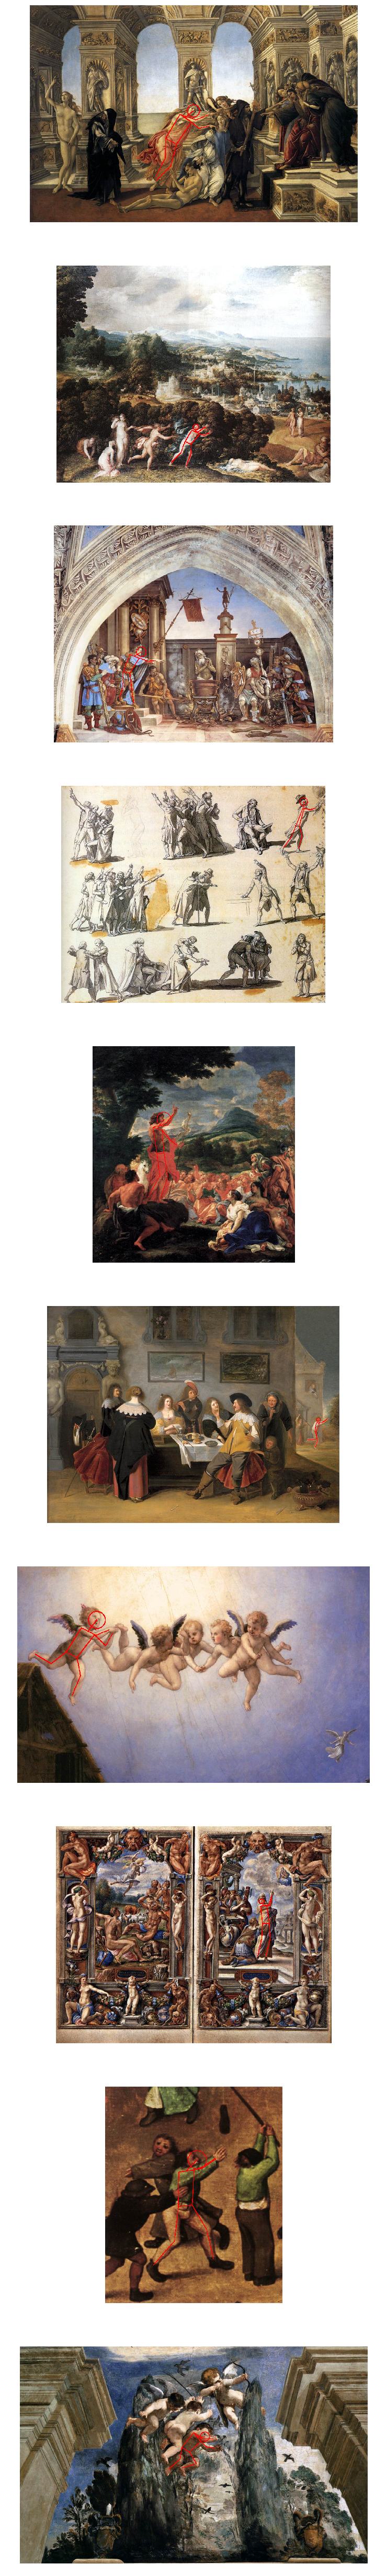

In [127]:
bd.plot_hypothesis(10901, 20, filtered_bodies, resized_bodies, all_relative_angles, filtered_paintings, deviation, approx=False)



In [21]:
neighbors = bd.get_n_nearest_neighbor(all_relative_angles, base_body, deviation, to_keep, n=20, dist=50)[1][0]

9.31731700897
0.905092000961


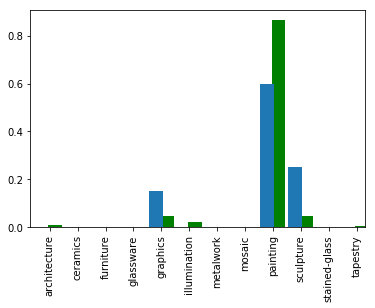

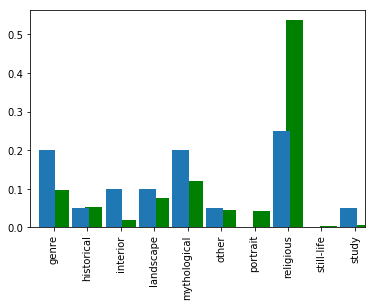

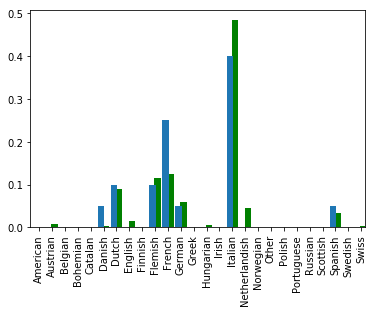

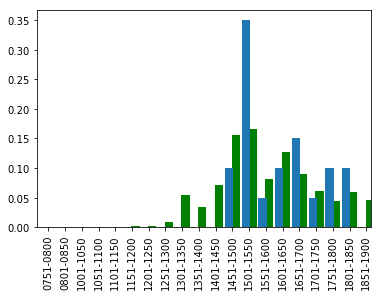

In [22]:
bd.histograms(filtered_paintings, neighbors, filtered_bodies, False, True, True, True, True)

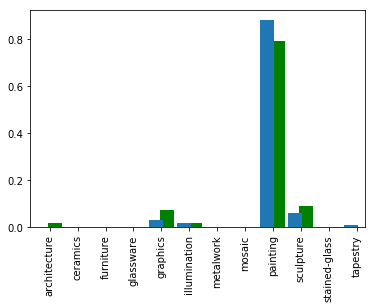

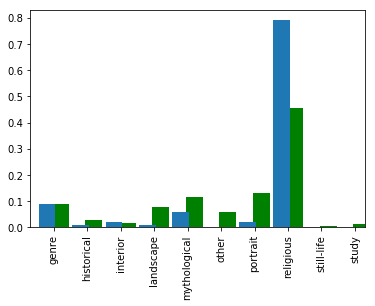

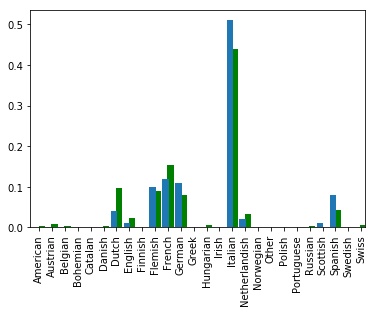

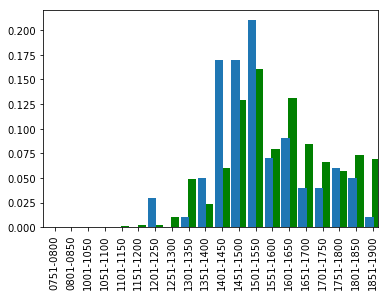

In [17]:
bd.histograms(filtered_paintings, neighbors, filtered_bodies, True, True, True, True, True)